# Mynt Advanced Analytics Project for Senior ML Engineers - Chor Eduarte

#### change logs: 
*    mk01:
    * basic 
*    mk02:  
    * add table of contents
    * parse date
    * preprocessing
    * 
* mk03:
    *

### Table of Contents <a class="anchor" id="toc"></a>

* [Problem Definition](#problemDefinition)
* [Reading the data](#readingTheData)
* [Data Exploration and Visualization](#EDA)
* [Data Pre-processing](#preprocessing)
* [Data Partition](#dataPartition)
* [Fit Model](#fitModel)
    * [Neural Network](#neural)
* [Model Evaluation](#modelEvaluation)

## Problem Definition
* [back to toc](#toc)

Rossmann is Germany's second-largest drug store chain. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column. Note that some stores in the dataset were temporarily closed for refurbishment

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

## Reading the data <a class="anchor" id="readingTheData"></a>
* [back to toc](#toc)

In [2]:
dataset = pd.read_csv('./dataset/train.csv',parse_dates=[2])
df_store = pd.read_csv('./dataset/store.csv')

C:\Users\reved\AppData\Local\Temp\ipykernel_5588\3423031158.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('./dataset/train.csv',parse_dates=[2])


In [3]:
dataset

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,2015-04-30,6228,650,1,1,0,0
1,2,4,2015-04-30,6884,716,1,1,0,0
2,3,4,2015-04-30,9971,979,1,1,0,0
3,4,4,2015-04-30,16106,1854,1,1,0,0
4,5,4,2015-04-30,6598,729,1,1,0,0
...,...,...,...,...,...,...,...,...,...
914624,1111,2,2013-01-01,0,0,0,0,a,1
914625,1112,2,2013-01-01,0,0,0,0,a,1
914626,1113,2,2013-01-01,0,0,0,0,a,1
914627,1114,2,2013-01-01,0,0,0,0,a,1


In [4]:
df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


## DATA EXPLORATION AND VISUALIZATION <a class="anchor" id="EDA"></a>
* [back to toc](#toc)

In [5]:
dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,2015-04-30,6228,650,1,1,0,0
1,2,4,2015-04-30,6884,716,1,1,0,0
2,3,4,2015-04-30,9971,979,1,1,0,0
3,4,4,2015-04-30,16106,1854,1,1,0,0
4,5,4,2015-04-30,6598,729,1,1,0,0


In [6]:
dataset.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
914624,1111,2,2013-01-01,0,0,0,0,a,1
914625,1112,2,2013-01-01,0,0,0,0,a,1
914626,1113,2,2013-01-01,0,0,0,0,a,1
914627,1114,2,2013-01-01,0,0,0,0,a,1
914628,1115,2,2013-01-01,0,0,0,0,a,1


In [7]:
dataset.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [8]:
#check for null values
dataset.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Luckily we do not have null values in our dataset :)

In [9]:
#check the correlation for the data
dataset.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,1.000000,-0.000008,0.005667,0.024734,-0.000129,0.000068,0.000041
DayOfWeek,-0.000008,1.000000,-0.461340,-0.386934,-0.530936,-0.393894,-0.205699
Sales,0.005667,-0.461340,1.000000,0.896073,0.675924,0.454348,0.076103
Customers,0.024734,-0.386934,0.896073,1.000000,0.615638,0.318701,0.064592
Open,-0.000129,-0.530936,0.675924,0.615638,1.000000,0.297299,0.075490
Promo,0.000068,-0.393894,0.454348,0.318701,0.297299,1.000000,0.055323
SchoolHoliday,0.000041,-0.205699,0.076103,0.064592,0.075490,0.055323,1.000000


<AxesSubplot:>

<Figure size 1440x1872 with 0 Axes>

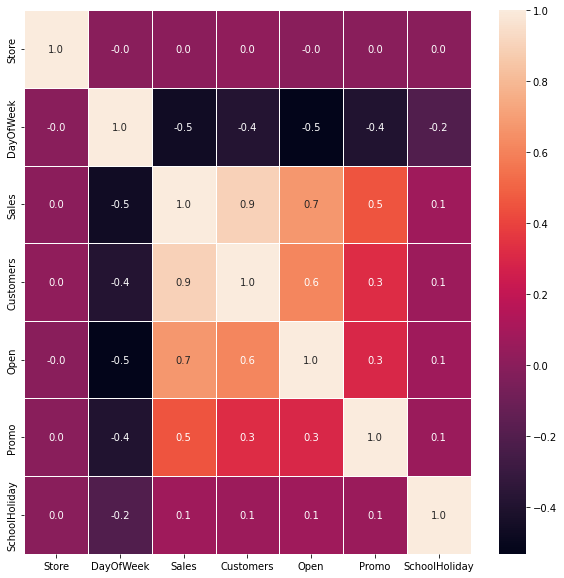

In [10]:
fig = plt.figure(figsize=(20,26))

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dataset.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

We can see in our heatmap that <b>Sales</b> is directly proportional with <b>Customers</b> with 0.9 score. Next is <b>Open</b>, with 0.7.

Another notable correlation is <b>Promo</b> which is likely to increase <b>Sales</b>

In [11]:
dataset.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,914629.000000,914629.000000,914629.000000,914629.000000,914629.000000,914629.000000,914629.000000
mean,558.477923,3.996935,5755.722525,634.081021,0.830830,0.380417,0.180269
std,321.912653,1.998012,3842.448149,464.756658,0.374902,0.485489,0.384411
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3711.000000,404.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5715.000000,609.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7826.000000,839.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,38722.000000,7388.000000,1.000000,1.000000,1.000000


In [12]:
# sns.scatterplot(data=dataset, x="DayOfWeek", y="Sales", hue="Promo")

## Data Pre-processing<a class="anchor" id="preprocessing"></a>
* [back to toc](#toc)

In [13]:
dataset.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [14]:
dataset['Month'] = dataset.Date.dt.month
dataset['Year'] = dataset.Date.dt.year
dataset['Day'] = dataset.Date.dt.day
dataset['WeekOfYear'] = dataset.Date.dt.isocalendar().week

In [15]:
#check unique values for StateHoliday column
dataset['StateHoliday'].unique()

array(['0', 'b', 'a', 'c', 0], dtype=object)

In [16]:
#perform encoding on StateHoliday column

dataset.loc[dataset['StateHoliday'] == '0', 'StateHoliday'] = 0
dataset.loc[dataset['StateHoliday'] == 'a', 'StateHoliday'] = 1
dataset.loc[dataset['StateHoliday'] == 'b', 'StateHoliday'] = 2
dataset.loc[dataset['StateHoliday'] == 'c', 'StateHoliday'] = 3

In [17]:
dataset

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,Day,WeekOfYear
0,1,4,2015-04-30,6228,650,1,1,0,0,4,2015,30,18
1,2,4,2015-04-30,6884,716,1,1,0,0,4,2015,30,18
2,3,4,2015-04-30,9971,979,1,1,0,0,4,2015,30,18
3,4,4,2015-04-30,16106,1854,1,1,0,0,4,2015,30,18
4,5,4,2015-04-30,6598,729,1,1,0,0,4,2015,30,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
914624,1111,2,2013-01-01,0,0,0,0,1,1,1,2013,1,1
914625,1112,2,2013-01-01,0,0,0,0,1,1,1,2013,1,1
914626,1113,2,2013-01-01,0,0,0,0,1,1,1,2013,1,1
914627,1114,2,2013-01-01,0,0,0,0,1,1,1,2013,1,1


In [18]:
dataset['StateHoliday'] = dataset['StateHoliday'].astype(int)
dataset['WeekOfYear'] = dataset['WeekOfYear'].astype(int)

In [19]:
X = dataset.iloc[:,[0,1,4,5,6,7,8,9,10,11,12]]
y = dataset.iloc[:,[3]]

In [20]:
X.dtypes

Store            int64
DayOfWeek        int64
Customers        int64
Open             int64
Promo            int64
StateHoliday     int32
SchoolHoliday    int64
Month            int64
Year             int64
Day              int64
WeekOfYear       int32
dtype: object

## Data Partition<a class="anchor" id="dataPartition"></a>
* [back to toc](#toc)

    

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [22]:
X_train

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,Day,WeekOfYear
0,1,4,650,1,1,0,0,4,2015,30,18
1,2,4,716,1,1,0,0,4,2015,30,18
2,3,4,979,1,1,0,0,4,2015,30,18
3,4,4,1854,1,1,0,0,4,2015,30,18
4,5,4,729,1,1,0,0,4,2015,30,18
...,...,...,...,...,...,...,...,...,...,...,...
731698,1044,5,758,1,0,0,0,6,2013,14,24
731699,1045,5,980,1,0,0,0,6,2013,14,24
731700,1046,5,689,1,0,0,0,6,2013,14,24
731701,1047,5,529,1,0,0,0,6,2013,14,24


In [23]:
y_train

,Sales
0,6228
1,6884
2,9971
3,16106
4,6598
...,...
731698,5022
731699,7635
731700,7641
731701,4658


## Fit Model<a class="anchor" id="fitModel"></a>
* [back to toc](#toc)

### Neural Network<a class="anchor" id="neural"></a>
* [back to toc](#toc)

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from numpy import asarray

In [25]:
# get the model
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(100, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(100, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(100, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(n_outputs, kernel_initializer='he_uniform'))
    model.compile(loss='mae', optimizer='adam',metrics='accuracy')
    return model

In [26]:
# load dataset
n_inputs, n_outputs = X_train.shape[1], y_train.shape[1]
# get model
model = get_model(n_inputs, n_outputs)
# fit the model on all data
# model.fit(X_train, y_train, verbose=1, epochs=100)


### Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [ ]:
# Random Forest

rf_params = {
    'n_estimators': 100,
    'criterion': 'absolute_error'
}

rf = RandomForestRegressor(**`rf_params)

rf.fit(X_train, y_train.values.ravel())



In [ ]:
rf_preds_train = rf.predict(X_train)


In [ ]:
rf_preds_val = rf.predict(X_test)


In [ ]:
train_mae_values['rf'] = mean_absolute_error(y_true=y_train, y_pred=rf_preds_train)
val_mae_values['rf'] = mean_absolute_error(y_true=y_val, y_pred=rf_preds_val)

In [ ]:
#Random Forest

yrf_pred = rf.predict(x_train)

print('Mean Absolute Error = {}'.format(mean_absolute_error(y_train, yrf_pred)))
print('Root Mean Squared Error = {}'.format(sqrt(mean_squared_error(y_train, yrf_pred))))
print('R Squared Score = {}'.format(r2_score(y_train, yrf_pred)))